In [50]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [51]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print(X_train.shape)

(50000, 32, 32, 3)


[9]


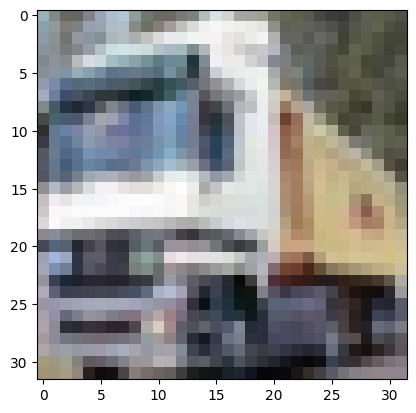

<Figure size 500x100 with 0 Axes>

In [52]:
plt.imshow(X_train[1])
plt.figure(figsize=(5,1))
print(y_train[1])

In [53]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]
print(classes[y_train[1][0]])

truck


In [54]:
X_train = X_train/255
X_test = X_test/255


In [55]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

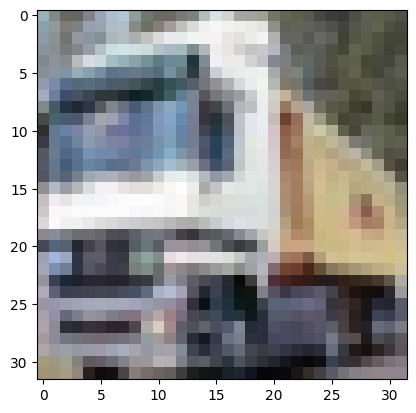

In [56]:
plt.imshow(X_train[1])

In [57]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print(y_train_one_hot[1])
print(y_train[1])
print(X_train[1].shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]
(32, 32, 3)


In [ ]:
from keras.callbacks import LearningRateScheduler, EarlyStopping
def lr_schedule(epoch):
    if epoch < 50:
        return 0.001
    elif epoch < 75:
        return 0.0005
    else:
        return 0.0001
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = LearningRateScheduler(lr_schedule)
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=5, batch_size=32)


In [ ]:
model.evaluate(X_test, y_test_one_hot)

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1])

In [ ]:
y_test[1]

Mean Squared Error: 0.07612933338948132


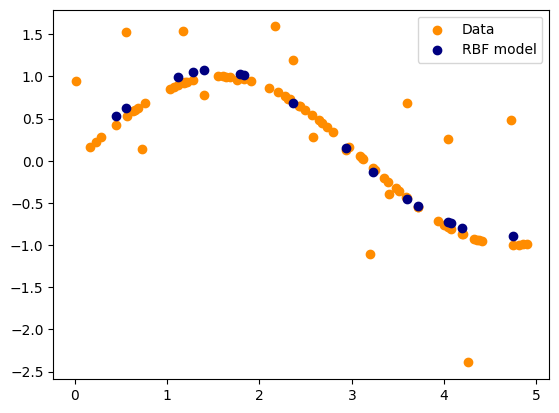

In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Fit the model
svr_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svr_rbf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(X, y, color='darkorange', label='Data')
plt.scatter(X_test, y_pred, color='navy', label='RBF model')
plt.legend()
plt.show()
